In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-bread-basket/bread basket.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('../input/the-bread-basket/bread basket.csv')
print(len(df))
df.head()

20507


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [4]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [5]:
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [7]:
df.date_time = pd.to_datetime(df.date_time)
#Changing to Datetime format

In [8]:
df.head(10)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend
5,3,Cookies,2016-10-30 10:07:00,morning,weekend
6,4,Muffin,2016-10-30 10:08:00,morning,weekend
7,5,Coffee,2016-10-30 10:13:00,morning,weekend
8,5,Pastry,2016-10-30 10:13:00,morning,weekend
9,5,Bread,2016-10-30 10:13:00,morning,weekend


In [9]:
df.Transaction.nunique()
#Unique transactions

9465

In [10]:
df['time'] = df.date_time.dt.time

df['hour'] = df.date_time.dt.hour                                      
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')

df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)

df['date'] = df.date_time.dt.date


df['weekday'] = df.date_time.dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6),('Monday','Tuesday','Wednesday',
                                                       'Thursday','Friday','Saturday','Sunday'))

df['month'] = df['date_time'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

df.drop('date_time', axis = 1, inplace = True)



In [11]:
df.head(10)

,Transaction,Item,period_day,weekday_weekend,time,hour,date,weekday,month
0,1,Bread,morning,weekend,09:58:00,9-10,2016-10-30,Sunday,October
1,2,Scandinavian,morning,weekend,10:05:00,10-11,2016-10-30,Sunday,October
2,2,Scandinavian,morning,weekend,10:05:00,10-11,2016-10-30,Sunday,October
3,3,Hot chocolate,morning,weekend,10:07:00,10-11,2016-10-30,Sunday,October
4,3,Jam,morning,weekend,10:07:00,10-11,2016-10-30,Sunday,October
5,3,Cookies,morning,weekend,10:07:00,10-11,2016-10-30,Sunday,October
6,4,Muffin,morning,weekend,10:08:00,10-11,2016-10-30,Sunday,October
7,5,Coffee,morning,weekend,10:13:00,10-11,2016-10-30,Sunday,October
8,5,Pastry,morning,weekend,10:13:00,10-11,2016-10-30,Sunday,October
9,5,Bread,morning,weekend,10:13:00,10-11,2016-10-30,Sunday,October


In [12]:
# cleaning the item column
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

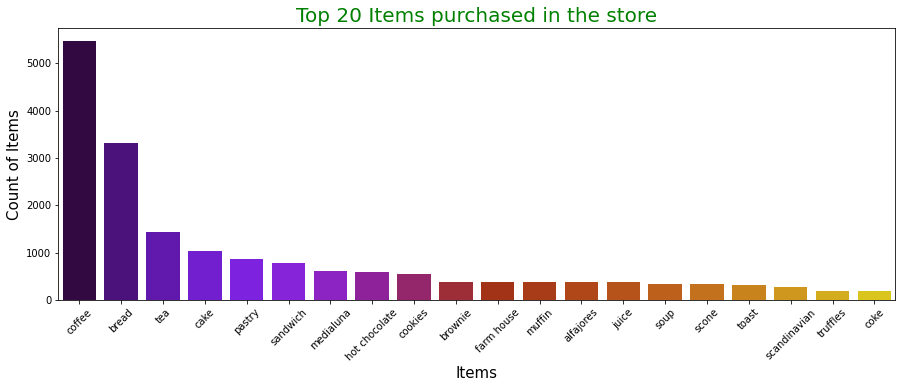

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased in the store', color = 'green', size = 20)
plt.show()

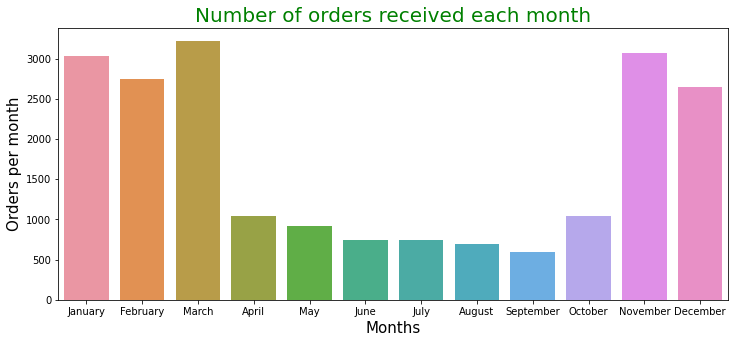

In [14]:
monthTran = df.groupby('month')['Transaction'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()


plt.show()

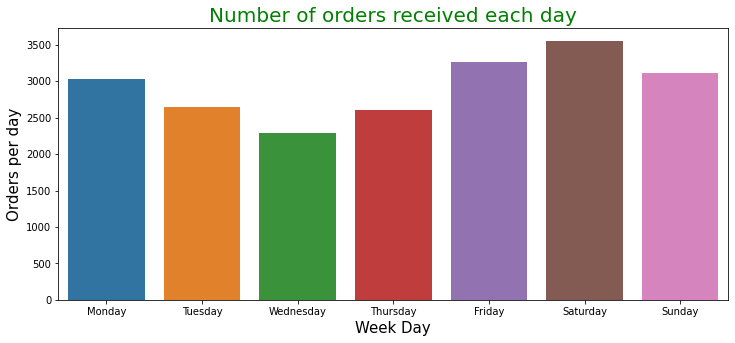

In [15]:
weekTran = df.groupby('weekday')['Transaction'].count().reset_index()
weekTran.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
weekTran.sort_values("weekorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran, x = "weekday", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'green', size = 20)
plt.show()


plt.show()

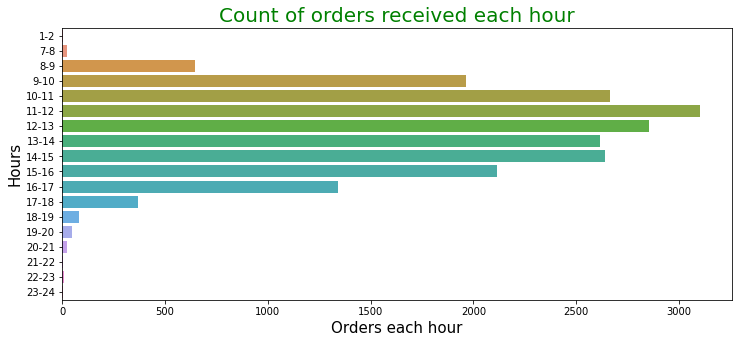

In [16]:
hourTran = df.groupby('hour')['Transaction'].count().reset_index()
hourTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "Transaction", y = "hour")
plt.ylabel('Hours', size = 15)
plt.xlabel('Orders each hour', size = 15)
plt.title('Count of orders received each hour', color = 'green', size = 20)
plt.show()

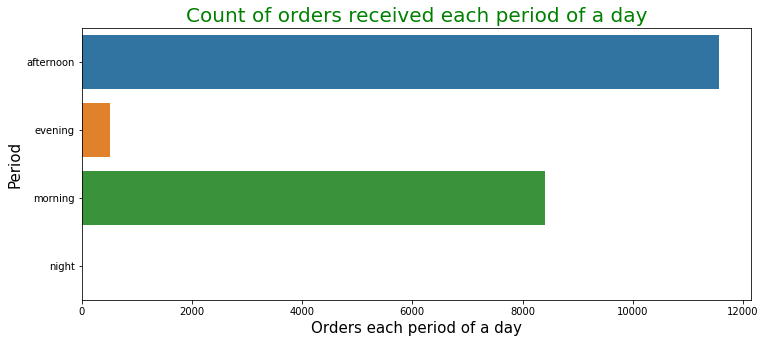

In [17]:
dayTran = df.groupby('period_day')['Transaction'].count().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data = dayTran, x = "Transaction", y = "period_day")
plt.ylabel('Period', size = 15)
plt.xlabel('Orders each period of a day', size = 15)
plt.title('Count of orders received each period of a day', color = 'green', size = 20)
plt.show()

In [18]:
print(dayTran)

  period_day  Transaction
0  afternoon        11569
1    evening          520
2    morning         8404
3      night           14


In [19]:
dates = df.groupby('date')['Transaction'].count().reset_index()
dates = dates[dates['Transaction']>=200].sort_values('date').reset_index(drop = True)
print(dates)
dates = pd.merge(dates, df[['date','weekday']], on = 'date', how = 'inner')
dates.drop_duplicates(inplace =True)
dates

         date  Transaction
0  2016-05-11          275
1  2016-11-19          209
2  2016-12-11          221
3  2017-01-28          237
4  2017-02-18          227
5  2017-03-25          246
6  2017-04-02          292
7  2017-04-03          257
8  2017-08-04          205
9  2017-11-03          203


,date,Transaction,weekday
0,2016-05-11,275,Wednesday
275,2016-11-19,209,Saturday
484,2016-12-11,221,Sunday
705,2017-01-28,237,Saturday
942,2017-02-18,227,Saturday
1169,2017-03-25,246,Saturday
1415,2017-04-02,292,Sunday
1707,2017-04-03,257,Monday
1964,2017-08-04,205,Friday
2169,2017-11-03,203,Friday


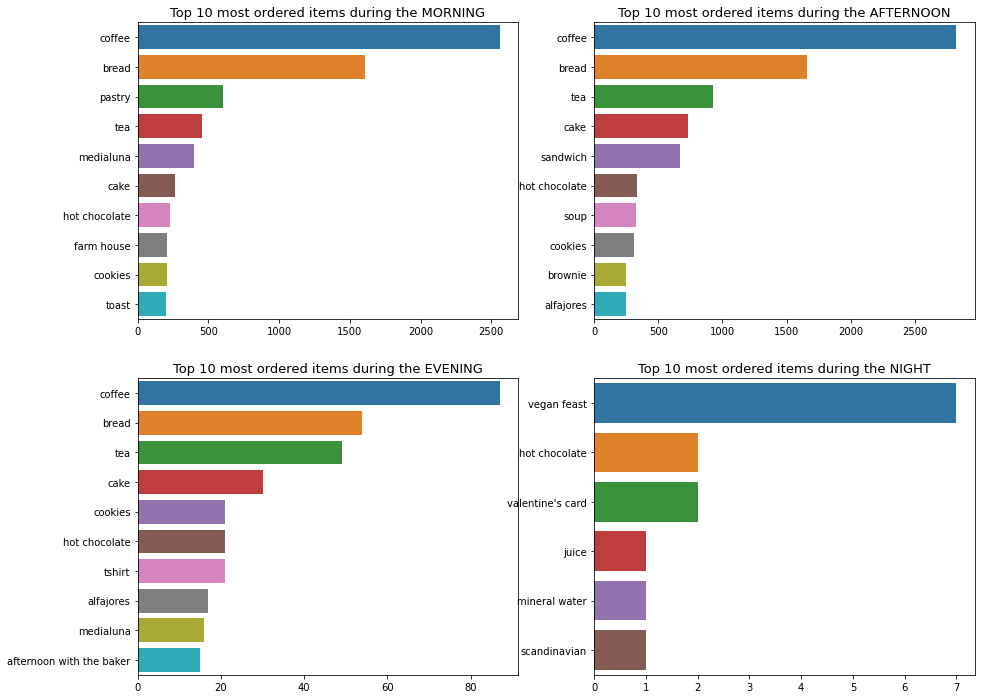

In [20]:
data = df.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'], ascending = False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize = (15,12))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = data[data.period_day == j].head(10)
    sns.barplot(data = df1, y = df1.Item, x = df1.Transaction)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 most ordered items during the {}'.format(j.upper()), size=13)

plt.show()

In [21]:
from mlxtend.frequent_patterns import association_rules, apriori

In [22]:
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [23]:
my_basket = transactions_str.pivot_table(index = 'Transaction', columns = 'Item', values = 'Count', aggfunc = 'sum').fillna(0)

my_basket.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
def encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
type(frequent_items)
frequent_items

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(coffee, toast)"
57,0.014369,"(tea, sandwich)"
58,0.010037,"(bread, coffee, cake)"
59,0.011199,"(bread, pastry, coffee)"


In [26]:
frequent_items.sort_values('support', ascending = False)

,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(bread, coffee)"
...,...,...
11,0.010565,(hearty & seasonal)
20,0.010460,(salad)
30,0.010354,"(bread, alfajores)"
58,0.010037,"(bread, coffee, cake)"


In [27]:
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [28]:
rules.sort_values('confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
